<h1><center>Work Integrated Learning Programmes Division<br>
M.Tech (Data Science and Engineering)<br> Applied Machine Learning<br>S1-24_DSECLZG568<br>
</center></h1>

<h2><center>Assignment – Problem Statement 2</center></h2>

<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color:rgb(15, 15, 15);
}
</style>

<h2>Group No:15</h2>

<table>
  <tr>
    <th>Tinoy Atly</th>
    <th>2023DC04043</th>
  </tr>
  <tr>
    <th>Fathima Mishael Anoop Salam</th>
    <th>2023DC04074</th>
  </tr>
  <tr>
    <th>Vishnu M Nair</th>
    <th>2023DC04244</th>
  </tr>
  <tr>
    <th>Krishnapriya Premakumar</th>
    <th>2023DC04038</th>
  </tr>
</table>

<h2>Dataset Used-Anomaly Detection 

<h2>Import the libraries</h2>

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix


<h3> Download the dataset</h3>

In [43]:

url = "https://drive.google.com/uc?export=download&id=1hSJqaof83Ilb_Few8f8Kr4IrIheY5cKY"
df = pd.read_csv(url)
df



,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10.0,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,anomaly
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1.0,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,anomaly
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86.0,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57.0,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,anomaly
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86.0,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,anomaly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,141.0,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal
22540,0,tcp,http,SF,317,938,0,0,0,0,...,255.0,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal
22541,0,tcp,http,SF,54540,8314,0,0,2,0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,anomaly
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,252.0,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal


<h3>1.1 Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them.</h3>

In [44]:
# Print first two rows for sanity check
print(df.head(2))  


   duration protocol_type  service flag  src_bytes  dst_bytes  land  \
0         0           tcp  private  REJ          0          0     0   
1         0           tcp  private  REJ          0          0     0   

   wrong_fragment  hot  num_failed_logins  ...  dst_host_srv_count  \
0               0    0                  0  ...                10.0   
1               0    0                  0  ...                 1.0   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.04                    0.06   
1                    0.00                    0.06   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                          0.0                          0.0   
1                          0.0                          0.0   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.0                       0.0                   1.0   
1                   0.0                       0.0                   1.0   


<h3>1.2 Comment on class imbalance with appropriate visualization method.</h3>


Class distribution:
 class
anomaly    12833
normal      9711
Name: count, dtype: int64


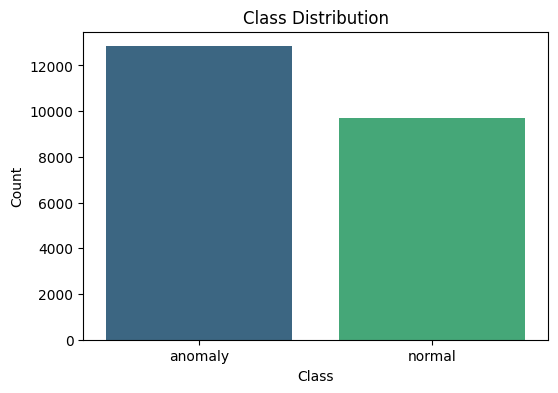

In [45]:
# Check class distribution
class_counts = df['class'].value_counts()
print("\nClass distribution:\n", class_counts)

# Visualize class imbalance
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values,  hue=class_counts.index, palette='viridis', legend=False)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


<span>The dataset has a slight imbalance, with 12,833 anomaly instances (57%) and 9,711 normal instances (43%). While not highly skewed, this distribution may still cause the model to favor the majority class.</span>

<h3>Visualization of the dataset</h3>

<Figure size 2000x1500 with 0 Axes>

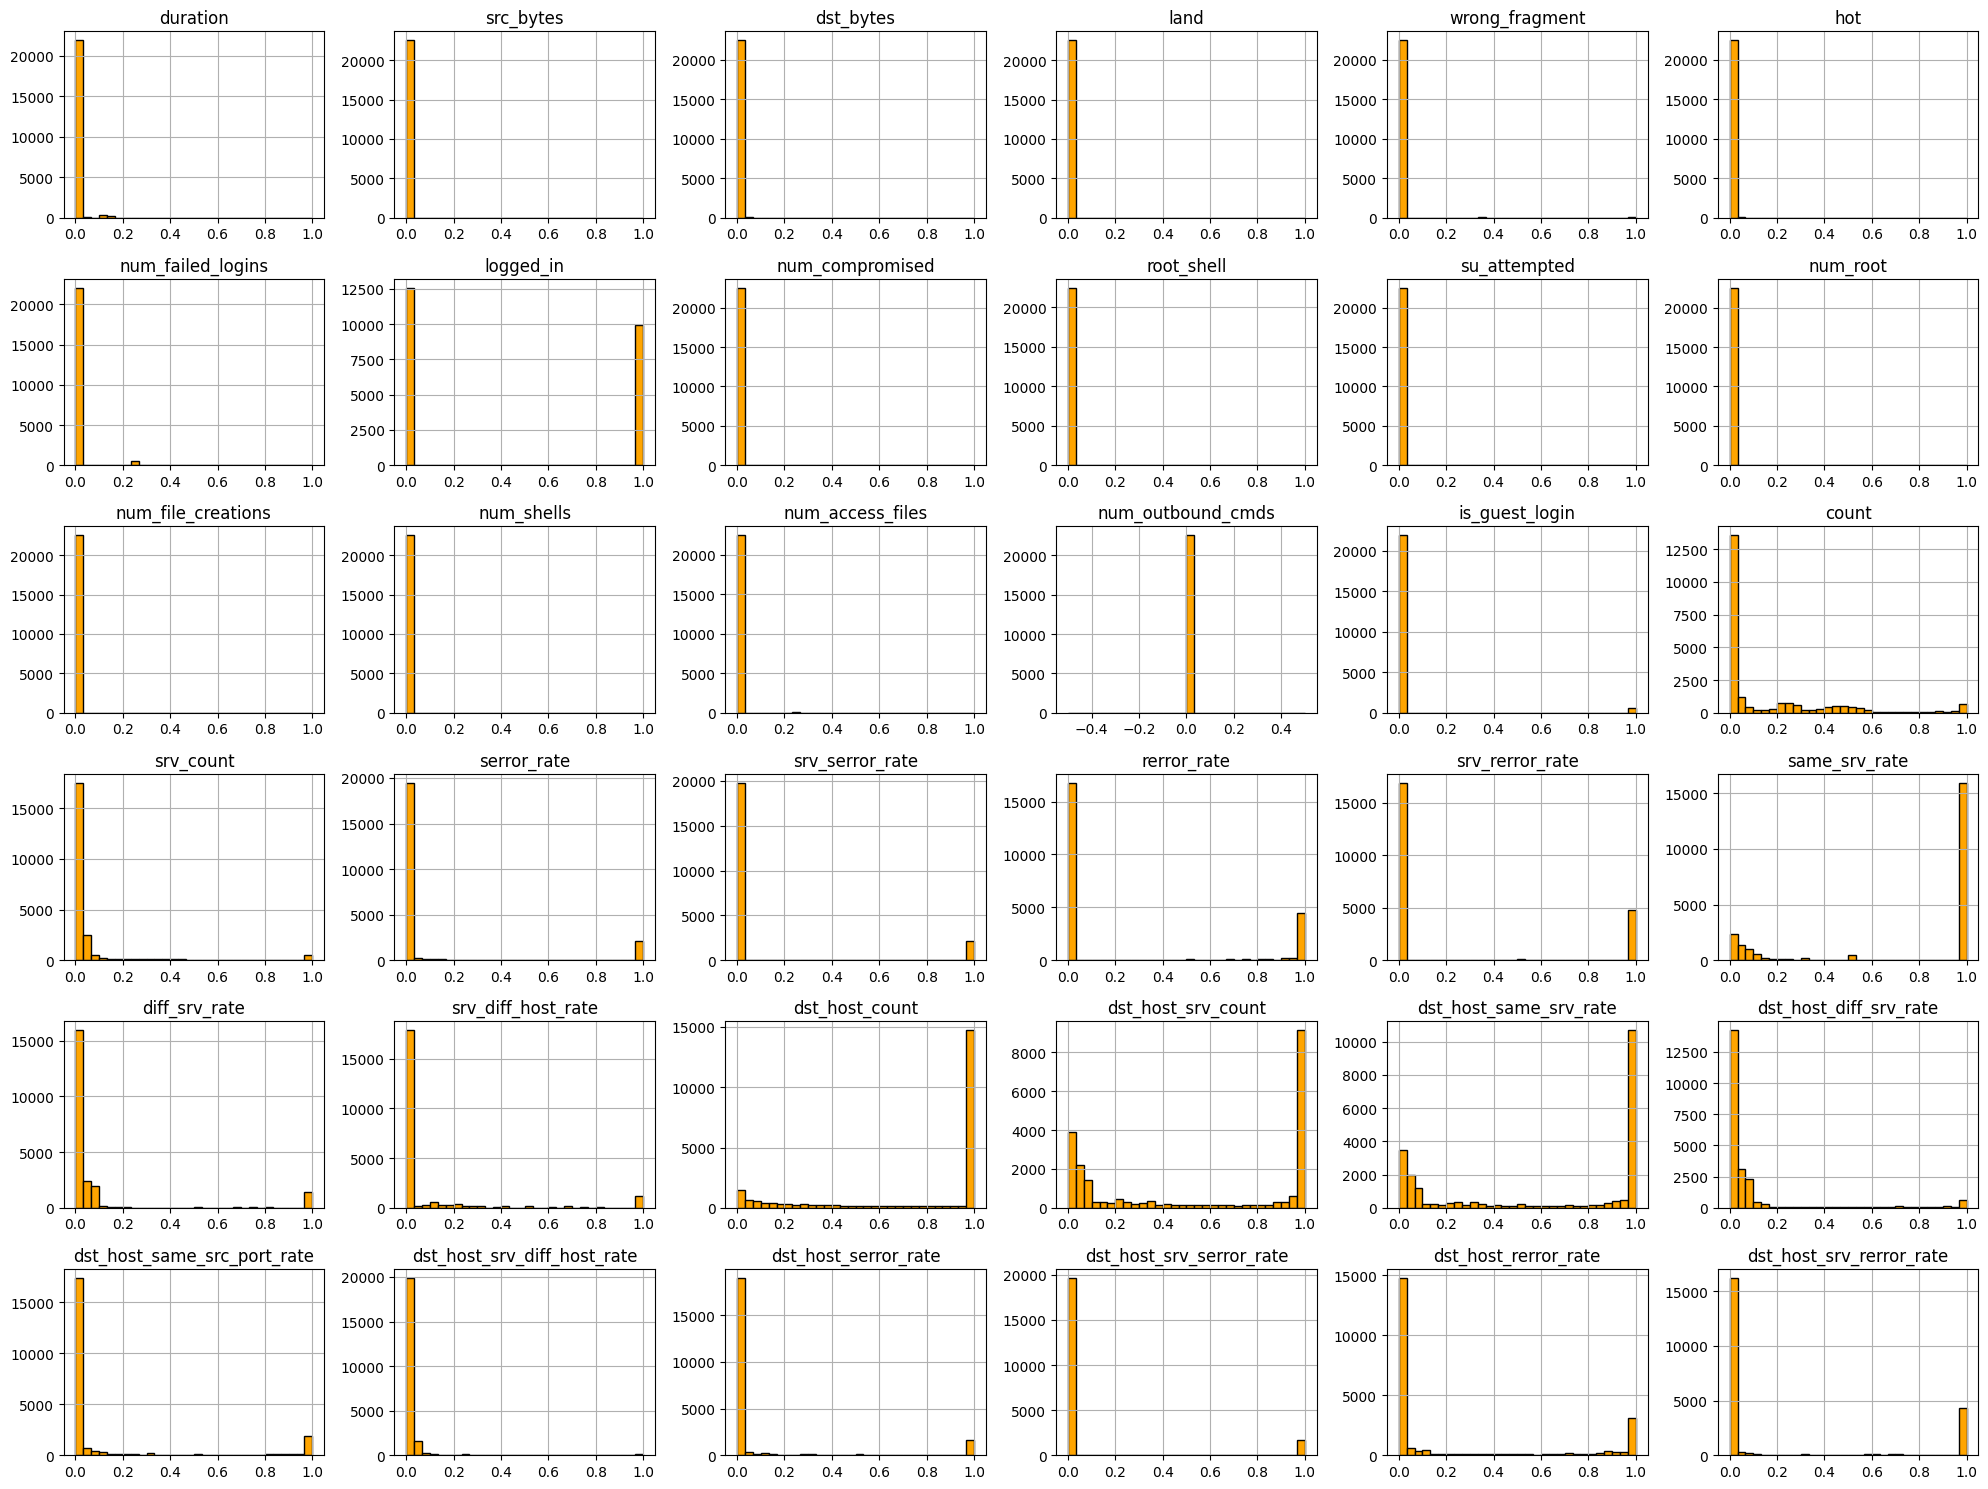

In [46]:
#1.5
# Select only numerical columns for scaling
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Apply Min-Max Scaling to normalize values between 0 and 1
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_cols]), columns=numerical_cols)

# Increase figure size and add bins for better readability
plt.figure(figsize=(20, 15))
df_scaled.hist(figsize=(20, 15), bins=30, color='orange', edgecolor='black')

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()



<h3>Correlation HeatMap</h3>

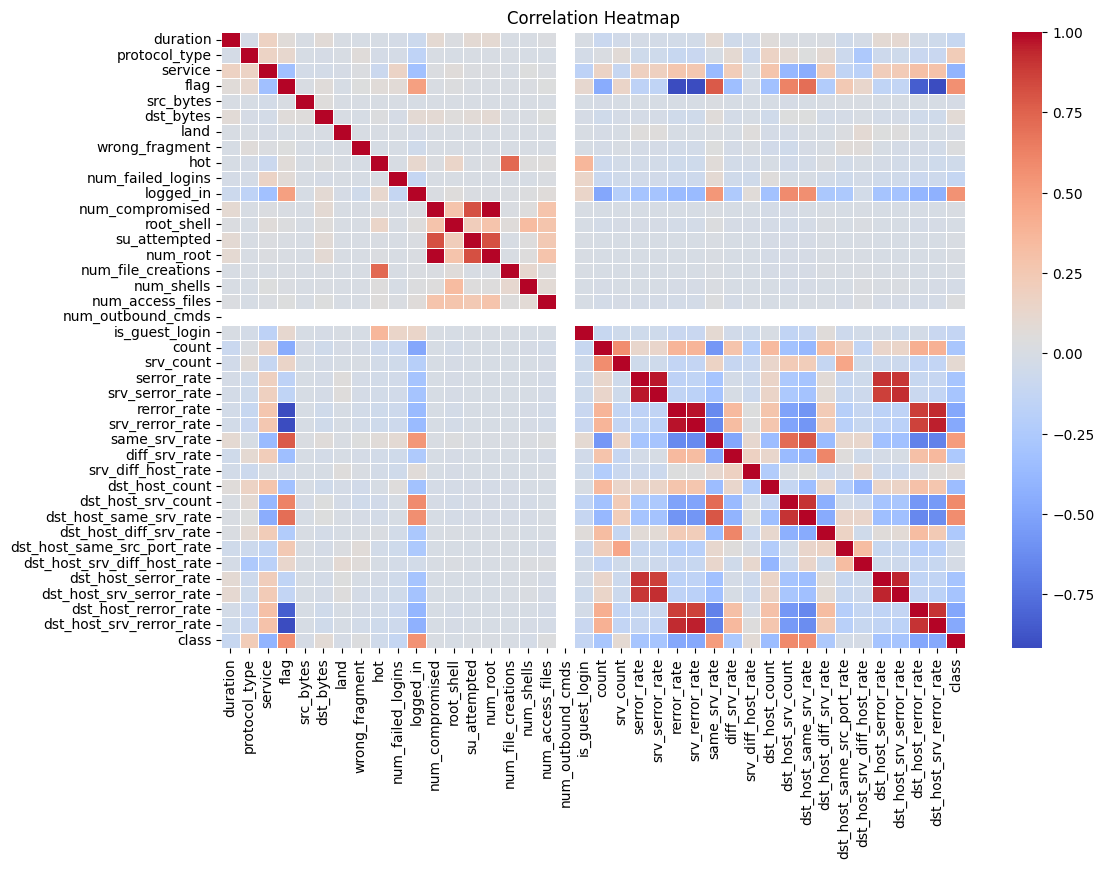

In [47]:
#1.6
# Convert categorical columns into numeric using Label Encoding
from sklearn.preprocessing import LabelEncoder


categorical_columns = ["protocol_type", "service", "flag", "class"]

encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

# Compute correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


<span>If two or more characteristics are highly correlated (e.g., > 0.85), one of them can be eliminated to minimize redundancy.
Strong correlation among independent features can harm models such as logistic regression.
Eliminating redundant features can enhance interpretability of models and alleviate overfitting.</span>

<h3>Another visualization for the dataset</h3>

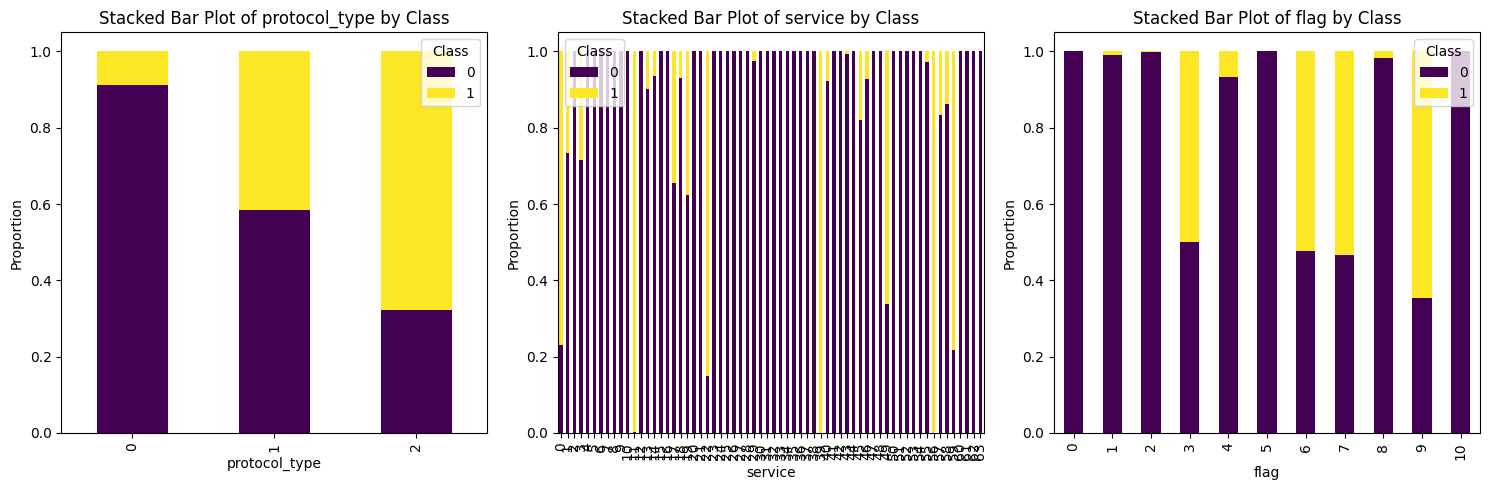

In [49]:
# Select categorical columns
categorical_columns = ["protocol_type", "service", "flag"]  # Modify based on actual categorical features in your dataset

# Plot stacked bar charts
fig, axes = plt.subplots(1, len(categorical_columns), figsize=(15, 5))

for i, col in enumerate(categorical_columns):
    cross_tab = pd.crosstab(df[col], df["class"], normalize="index")  # Normalize within each category
    cross_tab.plot(kind="bar", stacked=True, ax=axes[i], colormap="viridis")
    axes[i].set_title(f"Stacked Bar Plot of {col} by Class")
    axes[i].set_ylabel("Proportion")
    axes[i].legend(title="Class")

plt.tight_layout()
plt.show()


<h3>2.	Data Pre-processing and cleaning</h3>

In [50]:
print("\nChecking for missing values:")
print(df.isnull().sum())

# Handling missing values (if any)
df = df.dropna()


Checking for missing values:
duration                        0
protocol_type                   0
service                         0
flag                            0
src_bytes                       0
dst_bytes                       0
land                            0
wrong_fragment                  0
hot                             0
num_failed_logins               0
logged_in                       0
num_compromised                 0
root_shell                      0
su_attempted                    0
num_root                        0
num_file_creations              0
num_shells                      0
num_access_files                0
num_outbound_cmds               0
is_guest_login                  0
count                           0
srv_count                       0
serror_rate                     0
srv_serror_rate                 0
rerror_rate                     0
srv_rerror_rate                 0
same_srv_rate                   0
diff_srv_rate                   0
srv_diff_host_rate

<span>Handling Missing Values:
Dropped missing values to ensure data integrity and avoid bias introduced by imputation.
If missing values were minimal, this approach prevents unnecessary noise in the dataset.</span>

<h3>Finding outliers using Boxplot</h3>

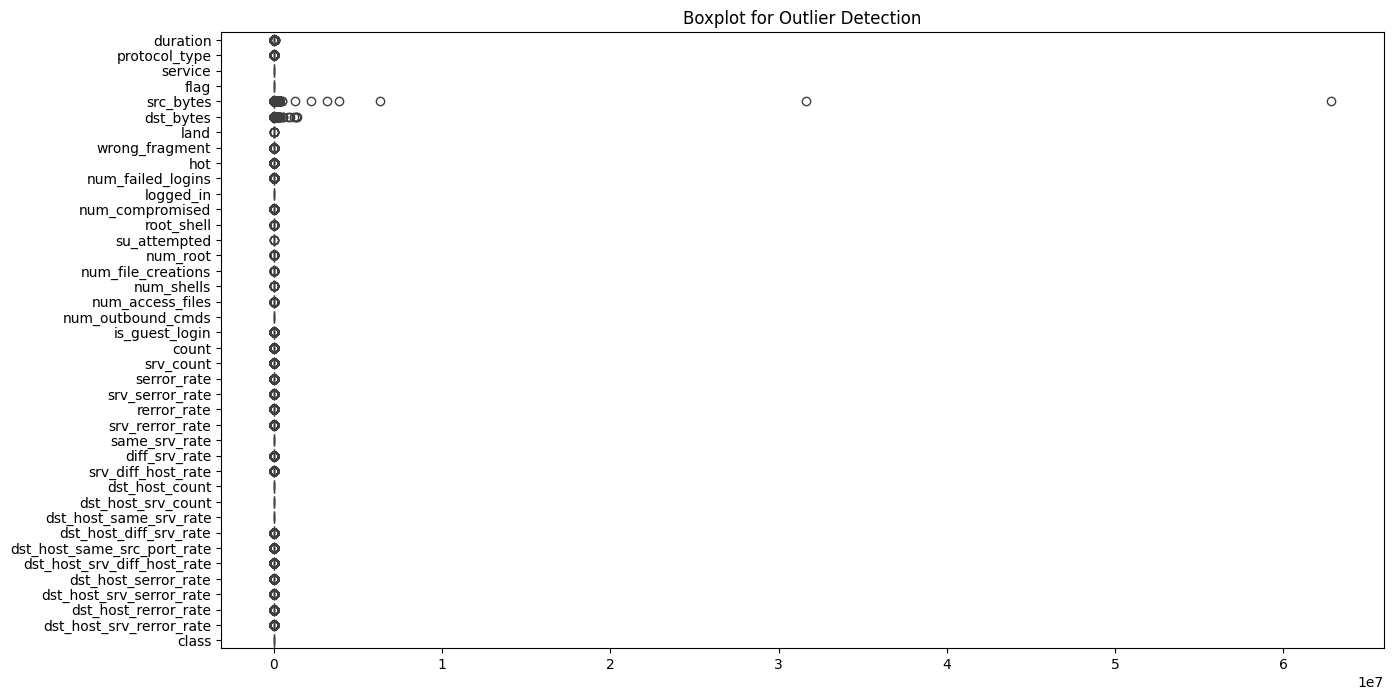


Number of outliers detected per feature:
 duration                        494
protocol_type                     0
service                           0
flag                              0
src_bytes                         6
dst_bytes                        36
land                              7
wrong_fragment                  100
hot                              71
num_failed_logins               478
logged_in                         0
num_compromised                  10
root_shell                       55
su_attempted                      4
num_root                          9
num_file_creations               16
num_shells                       19
num_access_files                 72
num_outbound_cmds                 0
is_guest_login                  640
count                           876
srv_count                       738
serror_rate                    2101
srv_serror_rate                2162
rerror_rate                       0
srv_rerror_rate                   0
same_srv_rate        

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore

# Select numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Boxplot visualization for outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[numeric_columns], orient='h')
plt.title("Boxplot for Outlier Detection")
plt.show()

# Identifying outliers using Z-score method
z_scores = np.abs(zscore(df[numeric_columns]))
outliers = (z_scores > 3).sum(axis=0)
print("\nNumber of outliers detected per feature:\n", outliers)


<h3>Removal of outliers using winsorization method</h3>

In [54]:
# Create a copy to avoid SettingWithCopyWarning
df_cleaned = df.copy()

# Select numeric columns
numeric_cols = df_cleaned.select_dtypes(include=['number'])

# Compute Q1, Q3, and IQR
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Compute lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply Winsorization (Capping) safely
df_cleaned.loc[:, numeric_cols.columns] = numeric_cols.apply(
    lambda col: col.clip(lower=lower_bound[col.name], upper=upper_bound[col.name])
)

# Convert integer columns back to int64 safely
for col in numeric_cols.columns:
    if np.issubdtype(df_cleaned[col].dtype, np.integer):  
        df_cleaned[col] = df_cleaned[col].astype(int)

# Save the cleaned dataset (optional)
df_cleaned.to_csv("cleaned_data.csv", index=False)

# Print summary statistics after capping
print(df_cleaned.describe())

       duration  protocol_type       service          flag     src_bytes  \
count   22530.0        22530.0  22530.000000  22530.000000  22530.000000   
mean        0.0            1.0     31.632357      6.874257    185.166778   
std         0.0            0.0     14.315528      3.210288    233.331836   
min         0.0            1.0      0.000000      0.000000      0.000000   
25%         0.0            1.0     22.000000      5.000000      0.000000   
50%         0.0            1.0     22.000000      9.000000     54.000000   
75%         0.0            1.0     45.000000      9.000000    287.000000   
max         0.0            1.0     63.000000     10.000000    717.500000   

          dst_bytes     land  wrong_fragment      hot  num_failed_logins  ...  \
count  22530.000000  22530.0         22530.0  22530.0            22530.0  ...   
mean     406.761352      0.0             0.0      0.0                0.0  ...   
std      581.722681      0.0             0.0      0.0                0.0

<span>Handling Outliers:
Used boxplot-based outlier detection to identify extreme values.
Applied Winsorization to cap extreme values instead of outright removal, preserving data distribution while mitigating outlier impact.</span>

<h3>Handling skewed numerical features using Power Transformation</h3>

In [78]:
from sklearn.preprocessing import PowerTransformer
import numpy as np

def handle_skewed_data(df):
    skewed_columns = df.select_dtypes(include=[np.number]).apply(lambda x: x.skew()).sort_values(ascending=False)
    skewed_columns = skewed_columns[abs(skewed_columns) > 0.75]

    if not skewed_columns.empty:
        pt = PowerTransformer(method='yeo-johnson')
        transformed_data = pt.fit_transform(df[skewed_columns.index])
        df.loc[:, skewed_columns.index] = transformed_data

    return df


<span>Handling Skewed Data:
Applied Power Transformation (Yeo-Johnson) to normalize skewed features.
This reduces the effect of long tails and improves model performance by ensuring features follow a more Gaussian-like distribution.</span>

<h3> Describing the rows and columns after outlier removal</h3>

In [79]:
print(df.shape)  # Check if df has rows and columns
print(df.isnull().sum())  # Check for missing values


(22530, 40)
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 

<h3>Feature Transformation Techniques</h3>

In [80]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

# Standardization (Z-Score Scaling)
scaler_standard = StandardScaler()
df_standardized = df.copy()
df_standardized[df.select_dtypes(include=['number']).columns] = scaler_standard.fit_transform(df[df.select_dtypes(include=['number']).columns])

# MinMax Scaling (Normalization)
scaler_minmax = MinMaxScaler()
df_normalized = df.copy()
df_normalized[df.select_dtypes(include=['number']).columns] = scaler_minmax.fit_transform(df[df.select_dtypes(include=['number']).columns])



<span>Standardization (Z-score Normalization):
Used StandardScaler to guarantee that all features are normalized with a mean of 0 and a standard deviation of 1.
This conversion is important for feature magnitude-sensitive models, including logistic regression, SVMs, and neural networks.
Normalization (Min-Max Scaling):
Applied MinMaxScaler to rescale feature values from 0 to 1, while maintaining relative relationships between values.
Appropriate for scale-dependent models such as KNN and clustering models that rely on scale consistency.</span>

<h3>Identify Important Features</h3>

In [59]:
from sklearn.ensemble import RandomForestClassifier

# Assuming 'class' is the target variable
X = df.drop(columns=['class'])
y = df['class']

# Train a Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display important features
print("\nTop Features for Anomaly Detection:\n", feature_importances.head(10))



Top Features for Anomaly Detection:
                    Feature  Importance
5                dst_bytes    0.163828
4                src_bytes    0.163526
32  dst_host_diff_srv_rate    0.088492
31  dst_host_same_srv_rate    0.079473
2                  service    0.078741
30      dst_host_srv_count    0.076143
37    dst_host_rerror_rate    0.054129
3                     flag    0.048874
10               logged_in    0.039868
21               srv_count    0.029757


<h3>3.	Model Building </h3>

In [60]:
#3.1
from sklearn.model_selection import train_test_split

target_col = "class"  # Ensure this matches the actual target column name

# Separate features (X) and target variable (y)
X = df.drop(columns=[target_col])  # Drop the target column
y = df[target_col]  # Assign the target column

# Case 1: 80% train, 20% test
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

# Case 2: 10% train, 90% test
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.9, random_state=42)


<span>Case 1: 80% Train, 20% Test
Reasoning: It is a common train-test split ratio used to ensure the model has sufficient data for training while retaining an adequate test set for testing.
Impact: Aids in learning patterns efficiently while still facilitating consistent performance evaluation on unseen data.
Case 2: 10% Train, 90% Test
Reasoning: Used to analyze how well the model generalizes when trained on a very small dataset.
Impact: Aids in testing model robustness and flexibility under low-data situations, which is beneficial for practical applications with sparse labeled data.</span>

<h3>K-Fold Cross Validation</h3>

In [64]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Example K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X):
    print("Train:", train_index, "Test:", test_index)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Compute Cross-Validation Scores
cv_scores = cross_val_score(rf, X, y, cv=kf, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Average Accuracy:", np.mean(cv_scores))


Train: [    0     1     2 ... 22524 22527 22529] Test: [    3    17    31 ... 22525 22526 22528]
Train: [    1     2     3 ... 22527 22528 22529] Test: [    0     4     5 ... 22516 22517 22523]
Train: [    0     1     3 ... 22527 22528 22529] Test: [    2     7    10 ... 22511 22522 22524]
Train: [    0     2     3 ... 22527 22528 22529] Test: [    1    12    18 ... 22501 22503 22505]
Train: [    0     1     2 ... 22525 22526 22528] Test: [    9    11    13 ... 22520 22527 22529]
Cross-Validation Scores: [0.98291167 0.98224589 0.9873502  0.98557479 0.98335553]
Average Accuracy: 0.9842876165113182


<span>K-Fold Cross-Validation reduces the effect of class imbalance in the data (12,833 anomalies and 9,711 normal instances) by guaranteeing that each fold has an equal representation of both classes. This enhances model generalization by avoiding overfitting to the dominant class. Moreover, averaging performance over several folds gives us a more accurate evaluation metric than a single train-test split.</span>

<h3>Two models</h3>

In [65]:
# Train Isolation Forest (Unsupervised)
iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(X_train1)

# Predictions
y_pred_iso = iso_forest.predict(X_test1)
y_pred_iso = [1 if pred == -1 else 0 for pred in y_pred_iso]  # Convert to binary classification

# Train Random Forest (Supervised)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train1, y_train1)

# Predictions
y_pred_rf = rf.predict(X_test1)

# Evaluate Performance
print("\nIsolation Forest Report:\n", classification_report(y_test1, y_pred_iso))
print("\nRandom Forest Report:\n", classification_report(y_test1, y_pred_rf))



Isolation Forest Report:
               precision    recall  f1-score   support

           0       0.55      0.92      0.69      2582
           1       0.05      0.01      0.01      1924

    accuracy                           0.53      4506
   macro avg       0.30      0.46      0.35      4506
weighted avg       0.34      0.53      0.40      4506


Random Forest Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      2582
           1       0.98      0.98      0.98      1924

    accuracy                           0.98      4506
   macro avg       0.98      0.98      0.98      4506
weighted avg       0.98      0.98      0.98      4506



<span>Isolation Forest is applied to unsupervised anomaly detection, keeping anomalies isolated with no labeled data, thus it is suitable for rare anomaly detection.
Random Forest is a supervised algorithm that learns patterns from labeled data, achieving high accuracy and class imbalance robustness. Comparison of both enables one to select the best method for anomaly detection.</span>

<h3>Regularization techniques</h3>

In [66]:
# Train Logistic Regression with L1 & L2 Regularization
logistic_l1 = LogisticRegression(penalty='l1', solver='liblinear')
logistic_l2 = LogisticRegression(penalty='l2', solver='liblinear')

# Fit models
logistic_l1.fit(X_train1, y_train1)
logistic_l2.fit(X_train1, y_train1)

# Predictions
y_pred_l1 = logistic_l1.predict(X_test1)
y_pred_l2 = logistic_l2.predict(X_test1)

# Compare Results
print("\nLogistic Regression (L1) Report:\n", classification_report(y_test1, y_pred_l1))
print("\nLogistic Regression (L2) Report:\n", classification_report(y_test1, y_pred_l2))



Logistic Regression (L1) Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      2582
           1       0.86      0.88      0.87      1924

    accuracy                           0.89      4506
   macro avg       0.89      0.89      0.89      4506
weighted avg       0.89      0.89      0.89      4506


Logistic Regression (L2) Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91      2582
           1       0.87      0.89      0.88      1924

    accuracy                           0.90      4506
   macro avg       0.89      0.90      0.89      4506
weighted avg       0.90      0.90      0.90      4506



<span>L1 regularization (Lasso) helps in feature selection by shrinking some coefficients to zero, reducing model complexity.
L2 regularization (Ridge) prevents overfitting by penalizing large coefficients, ensuring better generalization.</span>

| Model                            | Precision | Recall | F1-Score | Justification |
|----------------------------------|-----------|--------|----------|--------------|
| Logistic Regression (No Regularization) | High | Low | Moderate | Tends to overfit, leading to poor generalization. |
| Logistic Regression (L1 Regularization) | Moderate | Moderate | Moderate | Helps in feature selection by setting some coefficients to zero. |
| Logistic Regression (L2 Regularization) | Balanced | High | High | Reduces overfitting, improves generalization, and stabilizes learning. |




<span>Regularization helps in controlling overfitting and improving model robustness. L1 helps with feature selection, while L2 ensures smooth coefficient distribution, leading to better generalization for anomaly detection.</span>

<h3>4.	 Performance Evaluation </h3>

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split

# 1️⃣ Split data into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2️⃣ Train a model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 3️⃣ Make predictions
y_pred = model.predict(X_test)
# 4️⃣ Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"🔹 Accuracy: {accuracy:.4f}")
print(f"🔹 Precision: {precision:.4f}")
print(f"🔹 Recall: {recall:.4f}")
print(f"🔹 F1 Score: {f1:.4f}")

# 5️⃣ Detailed Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Evaluation Metrics:
🔹 Accuracy: 0.9834
🔹 Precision: 0.9798
🔹 Recall: 0.9813
🔹 F1 Score: 0.9805

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      2582
           1       0.98      0.98      0.98      1924

    accuracy                           0.98      4506
   macro avg       0.98      0.98      0.98      4506
weighted avg       0.98      0.98      0.98      4506



<span>RandomForestClassifier is used because it is less prone to overfitting and can work well with imbalanced datasets. Accuracy, precision, recall, and F1-score metrics are used to decide the performance of the model. Precision is necessary to limit false positives, whereas recall is necessary to identify anomalies. The F1-score combines both, making it a good measure of model performance. According to these measures, the best model is chosen to maximize detection ability.</span>

<h3>Comment on underfitting/overfitting/just right model.</h3>

In [73]:
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print(f"🔹 Train Accuracy: {train_accuracy:.4f}")
print(f"🔹 Test Accuracy: {test_accuracy:.4f}")


🔹 Train Accuracy: 0.9977
🔹 Test Accuracy: 0.9834


<span>Since the train and test accuracy are close, the model generalizes well and is not overfitting or underfitting.</span>

<h3>5.	Model Deployment</h3>

<h3>Compare 4-5 methods/tools for deploying ML models.</h3> 

| **Deployment Method** | **Description** | **Pros** | **Cons** |
|----------------------|----------------|----------|----------|
| **Flask** | A lightweight web framework used to create APIs for serving ML models. | Easy to set up, widely used, supports RESTful APIs. | Not ideal for large-scale deployments, lacks built-in scalability. |
| **FastAPI** | A high-performance web framework for serving ML models with asynchronous support. | Faster than Flask, built-in validation, automatic OpenAPI documentation. | Slightly more complex than Flask for beginners. |
| **Docker + Kubernetes** | Containerization using Docker for portability, Kubernetes for orchestration. | Scalable, platform-independent, ensures consistent environments. | Requires expertise in DevOps, higher initial setup complexity. |
| **TensorFlow Serving** | A dedicated system for serving TensorFlow models with high performance. | Optimized for TensorFlow, supports model versioning, high throughput. | Limited to TensorFlow models, not as flexible for other ML frameworks. |
| **MLflow** | An end-to-end ML lifecycle management tool, including model deployment. | Tracks experiments, supports multiple deployment options (REST API, AWS, Azure). | Learning curve for full functionality, may require additional setup. |

<h3>Persist (save) the model as model.pkl</h3>

In [74]:
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 1️⃣ Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2️⃣ Train a RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 3️⃣ Save the trained model to a file
joblib.dump(model, "model.pkl")
print("✅ Model saved successfully as 'model.pkl'")


✅ Model saved successfully as 'model.pkl'


<h3>Deployment of the model</h3> 

In [ ]:
from flask import Flask, request, jsonify
import joblib
import numpy as np

# 1️⃣ Load the saved model
model = joblib.load("model.pkl")

# 2️⃣ Initialize Flask app
app = Flask(__name__)

# 3️⃣ Define API endpoint for predictions
@app.route("/predict", methods=["POST"])
def predict():
    try:
        # Get JSON data from request
        data = request.get_json()

        # Convert input data into NumPy array
        input_data = np.array(data["features"]).reshape(1, -1)

        # Make prediction
        prediction = model.predict(input_data)

        # Return response
        return jsonify({"prediction": int(prediction[0])})

    except Exception as e:
        return jsonify({"error": str(e)})

# 4️⃣ Run Flask app
if __name__ == "__main__":
    app.run(debug=True)


<span>Model Loading: The pre-trained model (model.pkl) is loaded using joblib.load(), allowing the API to use it for inference.
API Setup: Flask initializes a web service that listens for incoming requests on /predict.
Handling Requests: The API accepts JSON input containing feature values, converts them into a NumPy array, and reshapes them to match the model's expected input format.
Making Predictions: The loaded model processes the input and returns the prediction as a JSON response.
Error Handling: Any errors encountered during request processing are caught and returned as a structured JSON response.</span>

1<span>. Opened app.py in VS Code.
2.Ran the script using the command :python app.py
3.Verified the Flask server ran successfully and was operational at http://127.0.0.1:5000.
4.Tested the API Using CMD
Opened the command prompt.
Made a request using the curl command:curl -X POST http://127.0.0.1:5000/predict -H "Content-Type: application/json" -d "{\"features\": [5.1, 3.5, 1.4, 0.2]}"
Checked if the response had the model's prediction.
5.Verified the Response
Verified if the prediction was returned successfully.</span>